# SVM Exercises

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

Load Pima diabetes dataset

In [2]:
url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv(url, names=names)

invalid = ['preg', 'skin', 'test']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)

data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.0,89,66,23.0,94.0,28.1,0.167,21,0
1,3.0,78,50,32.0,88.0,31.0,0.248,26,1
2,2.0,197,70,45.0,543.0,30.5,0.158,53,1
3,1.0,189,60,23.0,846.0,30.1,0.398,59,1
4,5.0,166,72,19.0,175.0,25.8,0.587,51,1


Split data into training, colidation, and test sets with a test size of 25%

In [3]:
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

y_col = 'class'

test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)

# Further split X and y of training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

Create a model with sklearn's SVC and a high gamma value (perhaps 1.0)

In [4]:
svm = SVC(gamma = 1.0)

svm.fit(X_train, y_train)

SVC(gamma=1.0)

Print accuracy of training and validation data

In [5]:
y_train_pred=svm.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  76.19047619047619


Create a model with sklearn's SVC and a low gamma value (perhaps .001)

In [6]:
low_gamma_svm = SVC(gamma = 0.001)

low_gamma_svm.fit(X_train, y_train)

SVC(gamma=0.001)

Print accuracy of training and validation data

In [7]:
y_train_pred2 = low_gamma_svm.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred2)*100)
y_val_pred2 = low_gamma_svm.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred2)*100)

Training Accuracy is  88.35978835978835
Validation Accuracy is  66.66666666666666


Explain the accuracy results below. 

When gamma is 1 it overfit and the training accuracy was a 100% but when we reduced it the training accuracy was 88.35%.

Print the confusion matrices for your high and low gamma models (both numeric and visualized)

Confusion Matrix:
[[48  0]
 [15  0]]
Confusion Matrix 2:
[[40  8]
 [13  2]]
/tmp/ipykernel_589/3190348048.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, fontsize=16)
/tmp/ipykernel_589/3190348048.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, fontsize=16)


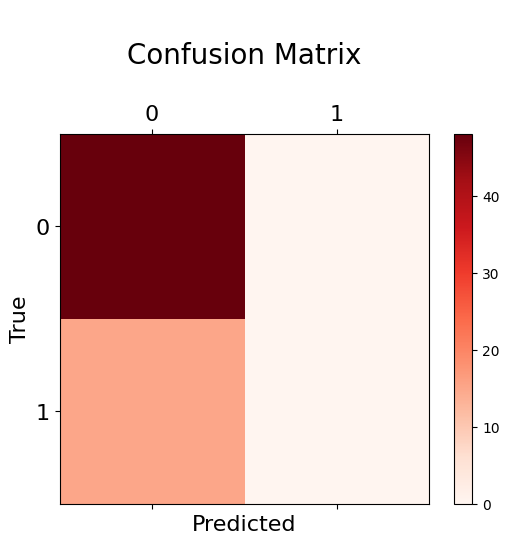

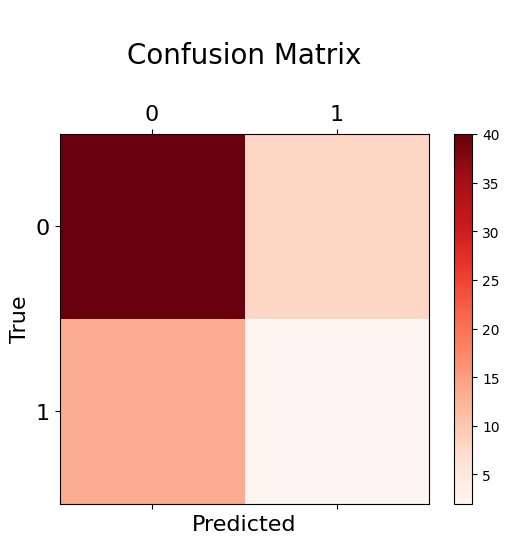

In [8]:
from sklearn import metrics
print('Confusion Matrix:')
labels = [0,1]
cm = metrics.confusion_matrix(y_val, y_val_pred, labels=labels)
print(cm)

print('Confusion Matrix 2:')
labels = [0,1]
cm2 = metrics.confusion_matrix(y_val, y_val_pred2, labels=labels)
print(cm2)

def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()
  
plot_cmatrix(cm,labels)
plot_cmatrix(cm2,labels)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=20b705ef-e160-4a38-9f01-3cd5fbef1605' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>